In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [2]:
data=pd.read_csv("adult.csv")
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data_num =data.copy()

In [4]:
data.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [6]:
data.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
# data cleaning

attrib, counts = np.unique(data["workclass"],return_counts= True)
most_freq_attrib= attrib[np.argmax(counts, axis=0)]
data['workclass'][data["workclass"]=='?']= most_freq_attrib

attrib, counts = np.unique(data["occupation"],return_counts= True)
most_freq_attrib= attrib[np.argmax(counts, axis=0)]
data['occupation'][data["occupation"]=='?']=most_freq_attrib

attrib, counts = np.unique(data["native-country"],return_counts= True)
most_freq_attrib= attrib[np.argmax(counts, axis=0)]
data['native-country'][data["native-country"]=="?"] = most_freq_attrib

In [8]:
data["workclass"][data["workclass"]=="?"]

Series([], Name: workclass, dtype: object)

In [9]:
data.head(10)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [10]:

data['income']=data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
data.head()


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


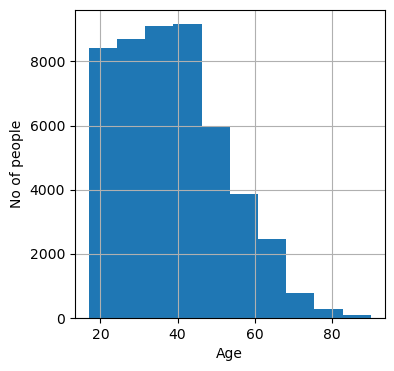

In [11]:
# EDA(Exploratory Data Analysis)
# distribution
data["age"].hist(figsize=(4,4))
plt.xlabel("Age")
plt.ylabel("No of people")
plt.show()

In [12]:
data

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [13]:
data[data["age"]>60].shape

(3606, 14)

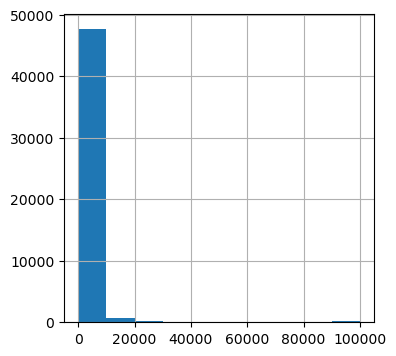

In [14]:
# distribution
data["capital-gain"].hist(figsize=(4,4))
plt.show()

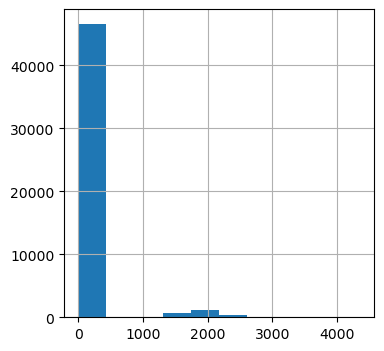

In [15]:
data["capital-loss"].hist(figsize=(4,4))
plt.show()

In [16]:
data[data["capital-loss"]>0].shape

(2282, 14)

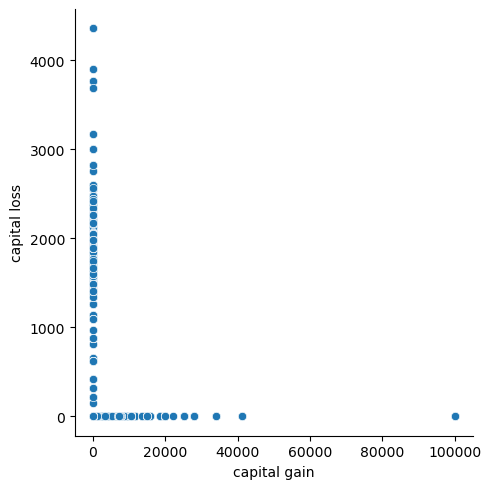

In [17]:
# relationship between capital gain and captial loss
sns.relplot("capital-gain","capital-loss",data=data)
plt.xlabel("capital gain")
plt.ylabel("capital loss")
plt.show()

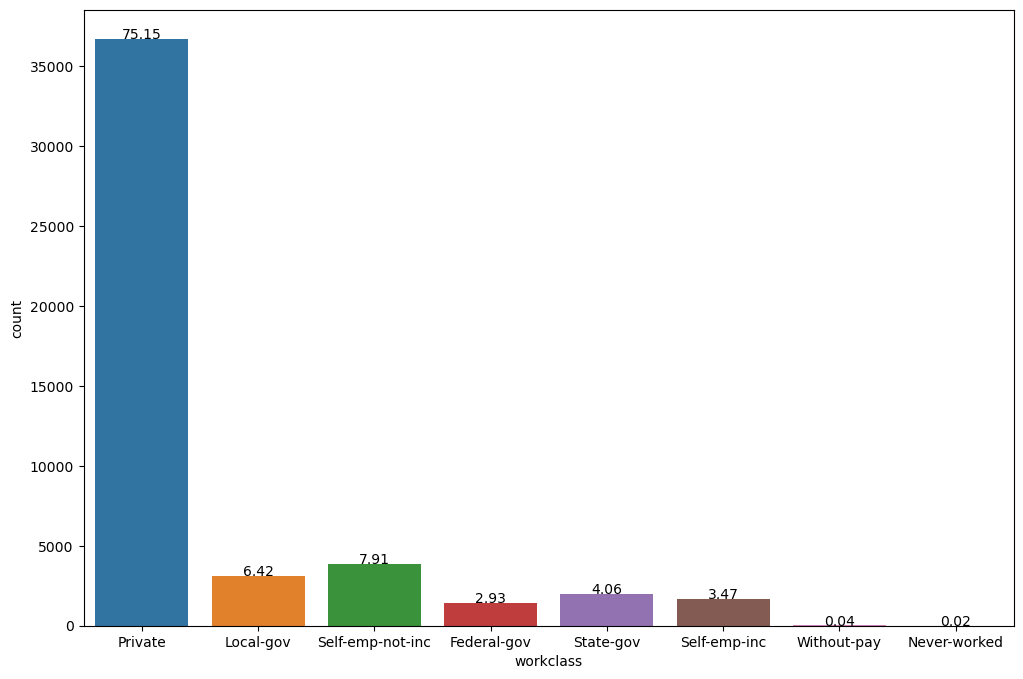

In [18]:
plt.figure(figsize=(12,8))
total=float(len(data["income"]))
ax=sns.countplot(x="workclass",data=data)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3,
           "{:1.2f}".format((height/total)*100),ha="center")
plt.show()

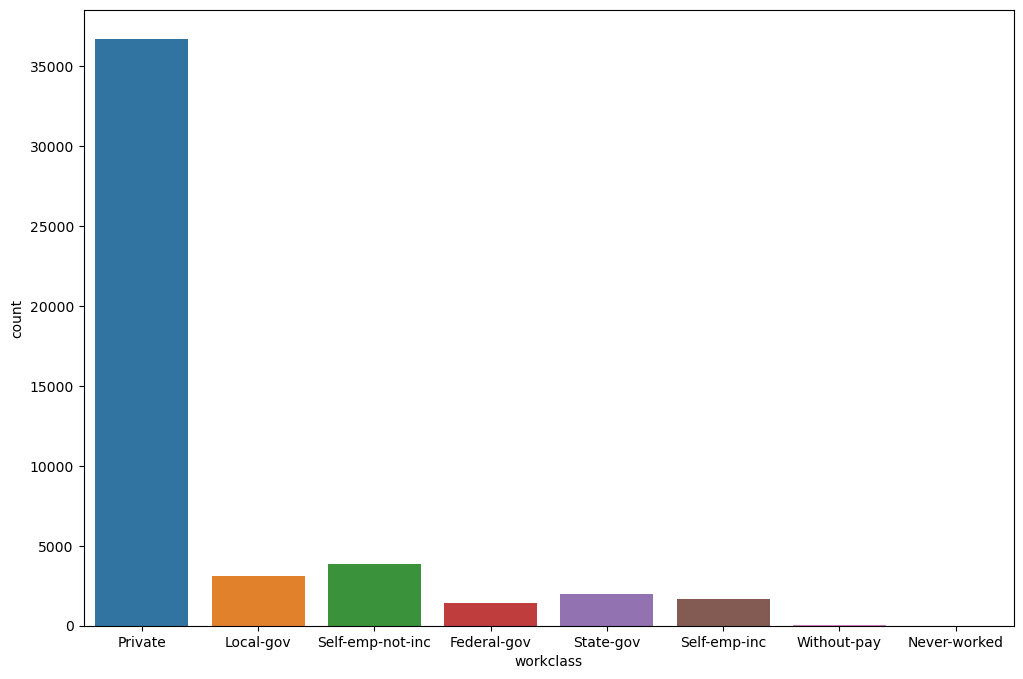

In [19]:
plt.figure(figsize=(12,8))
# total=float(len(data["income"]))
ax=sns.countplot(x="workclass",data=data)
# for p in ax.patches:
#     height=p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,height+3,
#            "{:1.2f}".format((height/total)*100),ha="center")
plt.show()

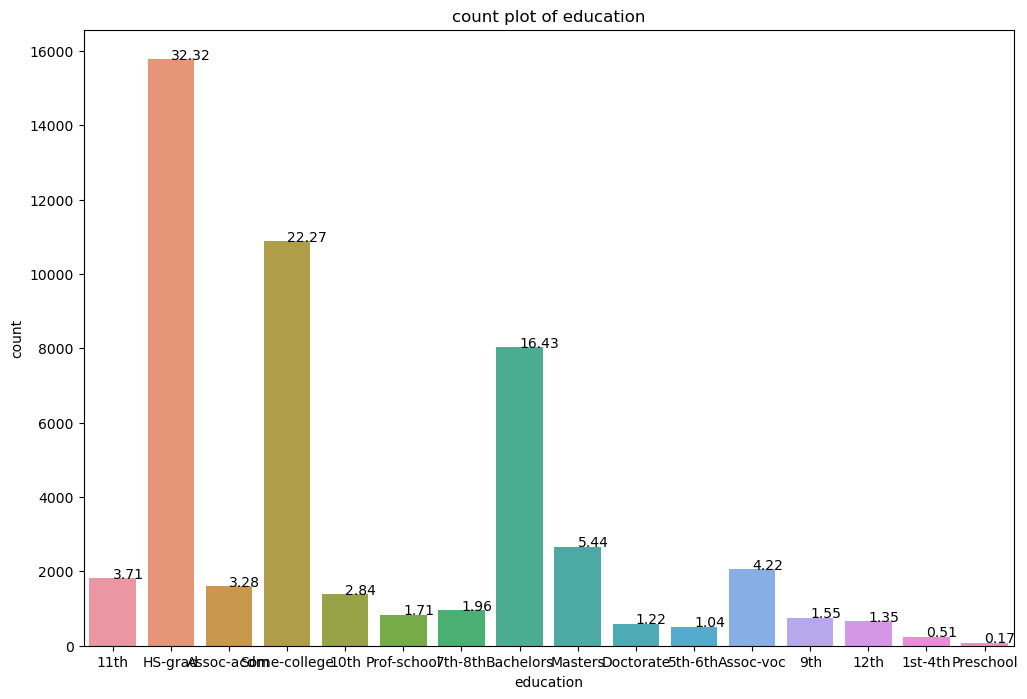

In [20]:
plt.figure(figsize=(12,8))
total=float(len(data["income"]))
ax=sns.countplot(x="education",data=data)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3,
           "{:1.2f}".format((height/total)*100),ha="left")
plt.title("count plot of education")
plt.show()

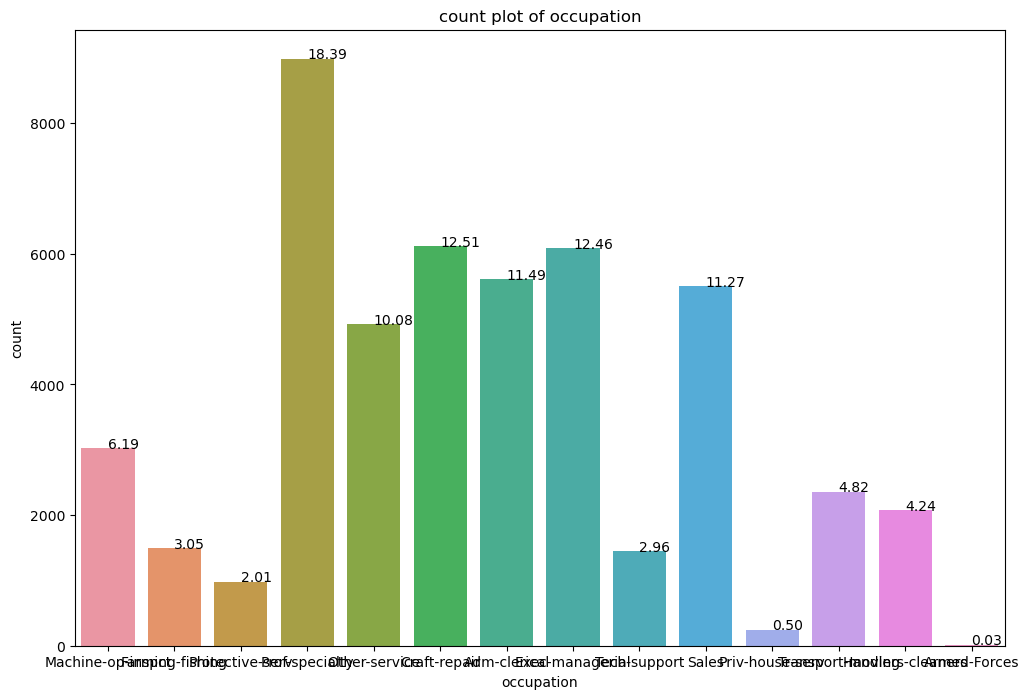

In [21]:
plt.figure(figsize=(12,8))
total=float(len(data))
ax=sns.countplot(x="occupation",data=data)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3,
           "{:1.2f}".format((height/total)*100),ha="left")
plt.title("count plot of occupation")
plt.show()

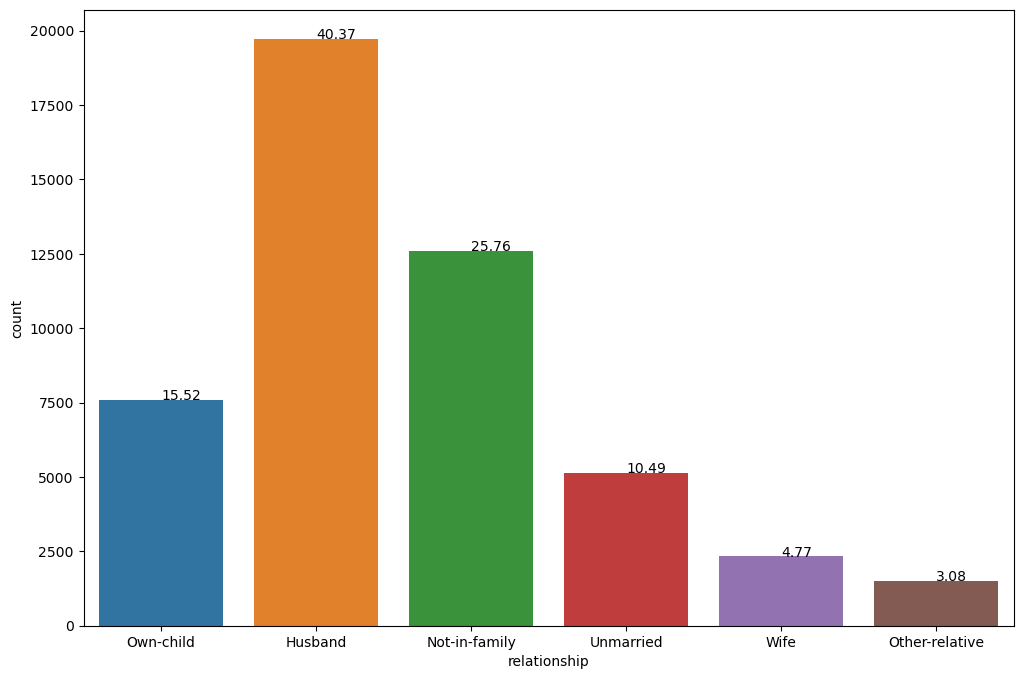

In [22]:
plt.figure(figsize=(12,8))
total=float(len(data))
ax=sns.countplot(x="relationship",data=data)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3,
           "{:1.2f}".format((height/total)*100),ha="left")

plt.show()

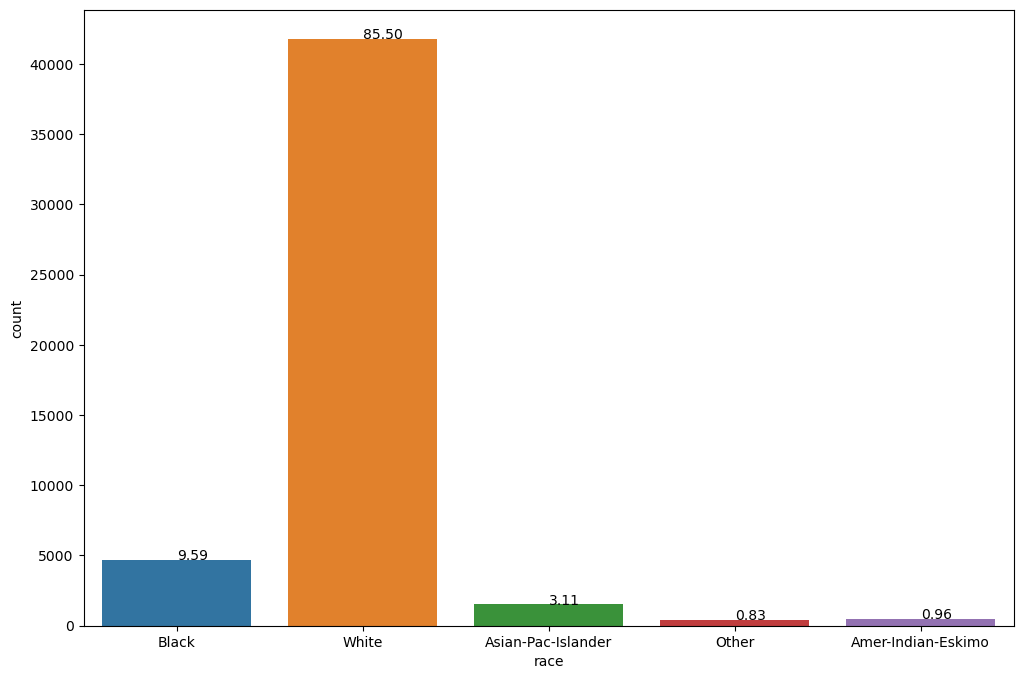

In [23]:
plt.figure(figsize=(12,8))
total=float(len(data))
ax=sns.countplot(x="race",data=data)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3,
           "{:1.2f}".format((height/total)*100),ha="left")

plt.show()

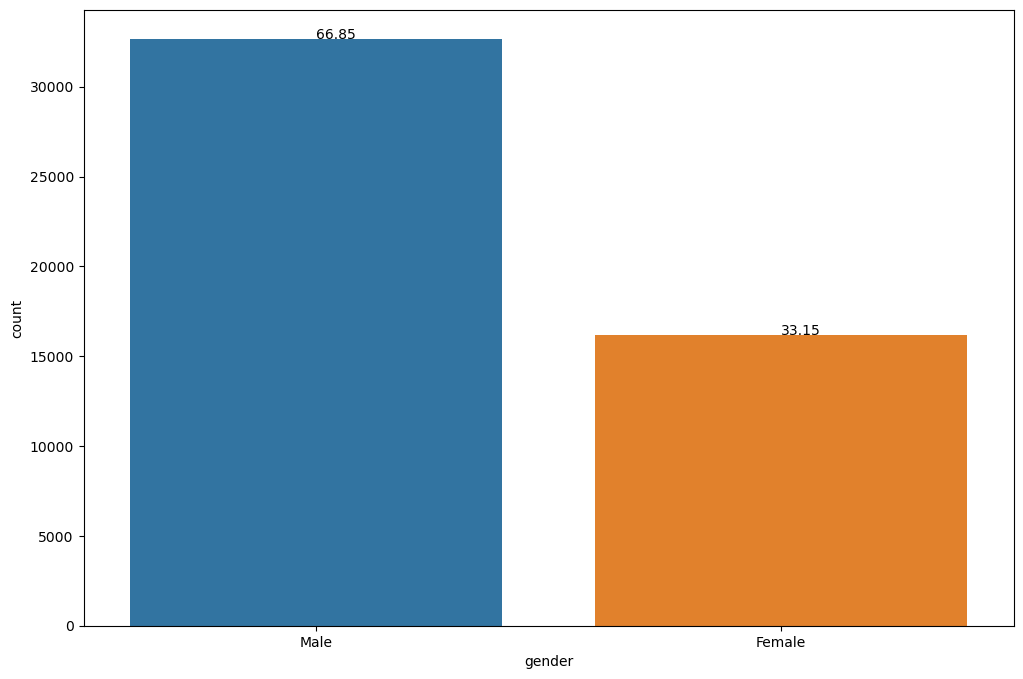

In [24]:
plt.figure(figsize=(12,8))
total=float(len(data))
ax=sns.countplot(x="gender",data=data)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3,
           "{:1.2f}".format((height/total)*100),ha="left")

plt.show()

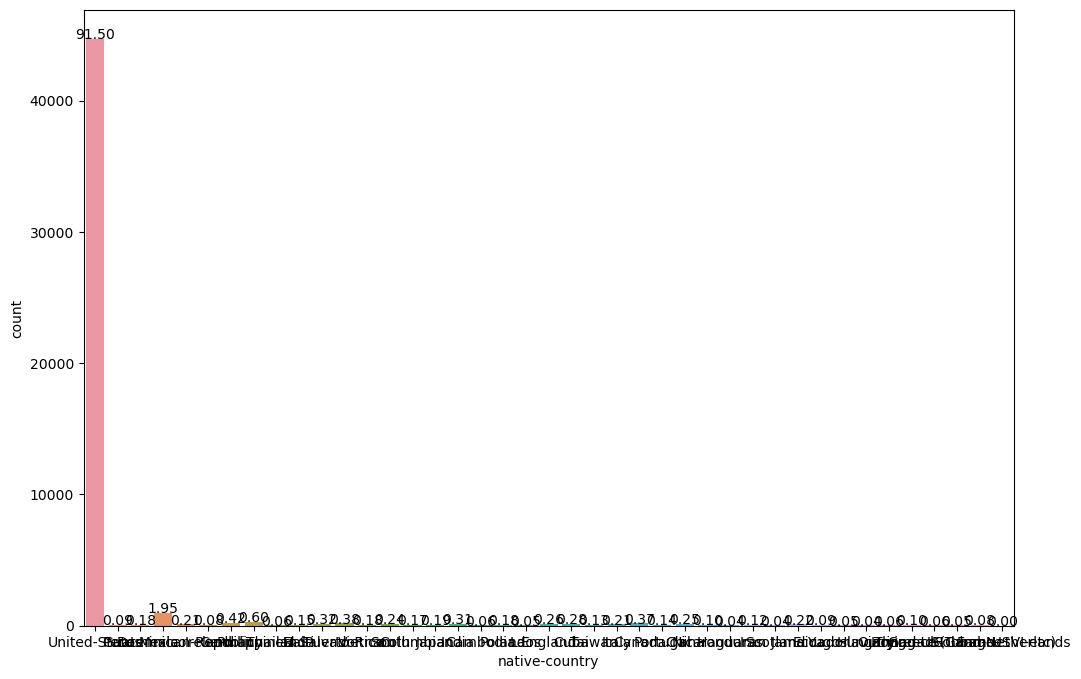

In [25]:
plt.figure(figsize=(12,8))
total=float(len(data))
ax=sns.countplot(x="native-country",data=data)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+3,
           "{:1.2f}".format((height/total)*100),ha="center")

plt.show()

In [26]:
data

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


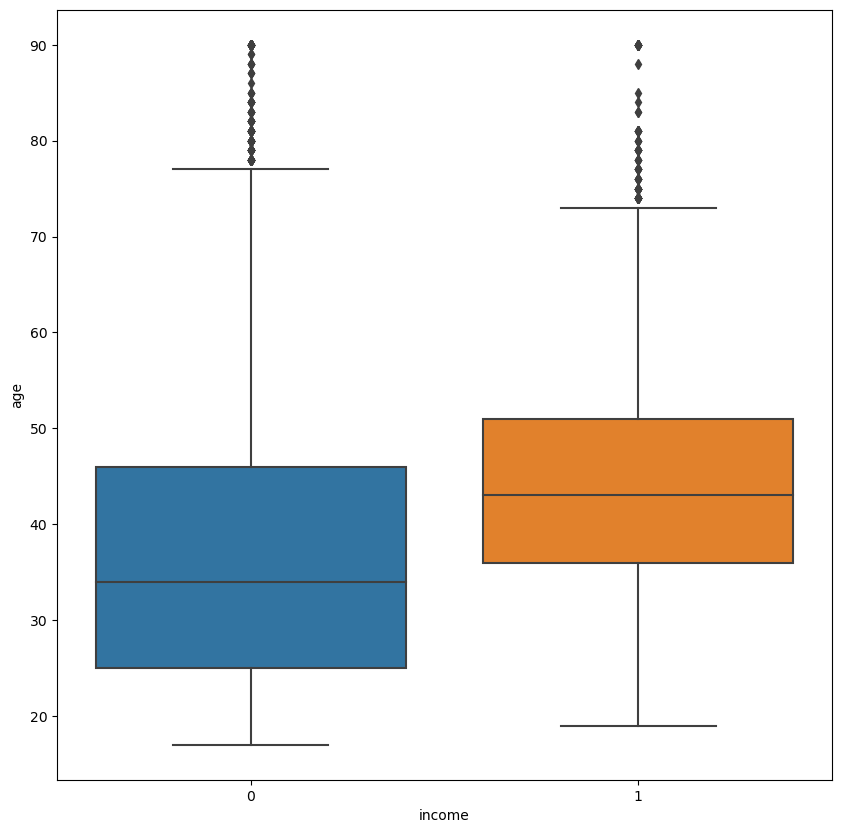

In [27]:
fig = plt.figure(figsize=(10,10))
sns.boxplot("income", "age", data=data)
plt.show()

In [28]:
data[["income","age"]].groupby(["income"],as_index=False).median().sort_values(by="age",ascending=False)

,income,age
1,1,43.0
0,0,34.0


In [29]:
import random
datatest =  data[(np.abs(stats.zscore(data["age"]))<3)]

income_1 = datatest[datatest['income']==1]["age"]
income_0 = datatest[datatest['income']==0]["age"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)


In [30]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1, income_0, equal_var= False)
print("ttest",ttest)
print("p value",pval)

if pval<0.05:
    print("We reject null hypothesis hence depedent or have relation")
else:
    print("we accept null hypothesis hence independent")

ttest 5.841925937131236
p value 2.1635197250554845e-08
We reject null hypothesis hence depedent or have relation


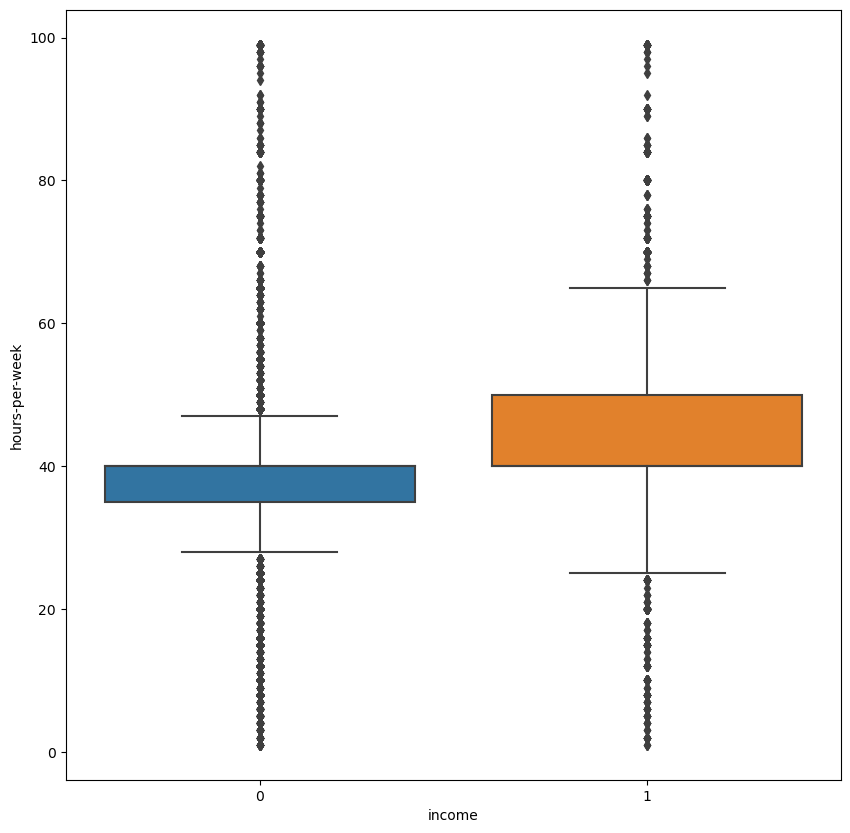

In [31]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="income", y="hours-per-week",data=data)
plt.show()

In [32]:
data =  data[(np.abs(stats.zscore(data["hours-per-week"]))<3)]

income_1 = datatest[datatest['income']==1]["hours-per-week"]
income_0 = datatest[datatest['income']==0]["hours-per-week"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1, income_0, equal_var= False)
print("ttest",ttest)
print("p value",pval)

if pval<0.05:
    print("We reject null hypothesis hence depedent or have relation")
else:
    print("we accept null hypothesis hence independent")


ttest 3.6783207748126987
p value 0.00030839418455783866
We reject null hypothesis hence depedent or have relation


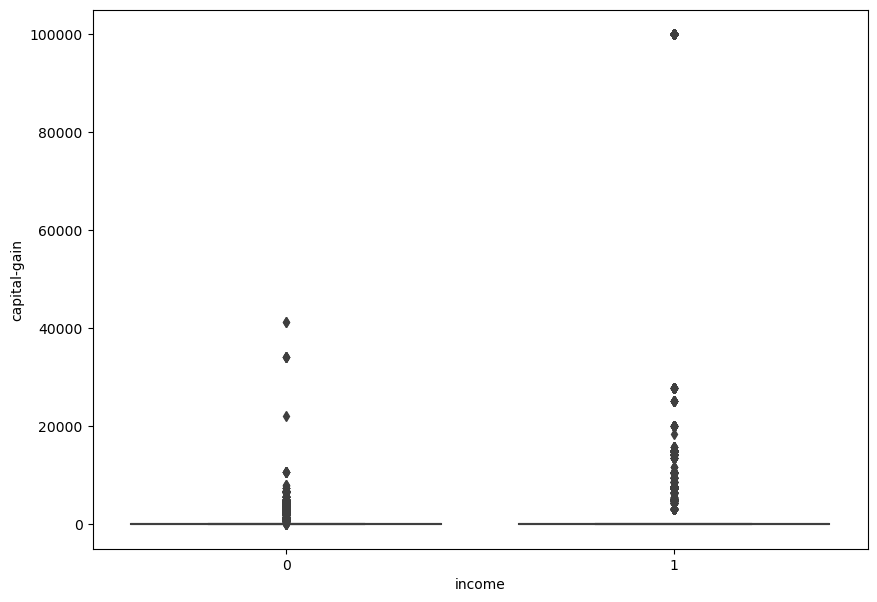

In [33]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income",y="capital-gain",data=data)
plt.show()

In [34]:
data =  data[(np.abs(stats.zscore(data["capital-gain"]))<3)]

income_1 = datatest[datatest['income']==1]["capital-gain"]
income_0 = datatest[datatest['income']==0]["capital-gain"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1, income_0, equal_var= False)
print("ttest",ttest)
print("p value",pval)

if pval<0.05:
    print("We reject null hypothesis hence depedent or have relation")
else:
    print("we accept null hypothesis hence independent")

ttest 2.9227521536435535
p value 0.004296836155678191
We reject null hypothesis hence depedent or have relation


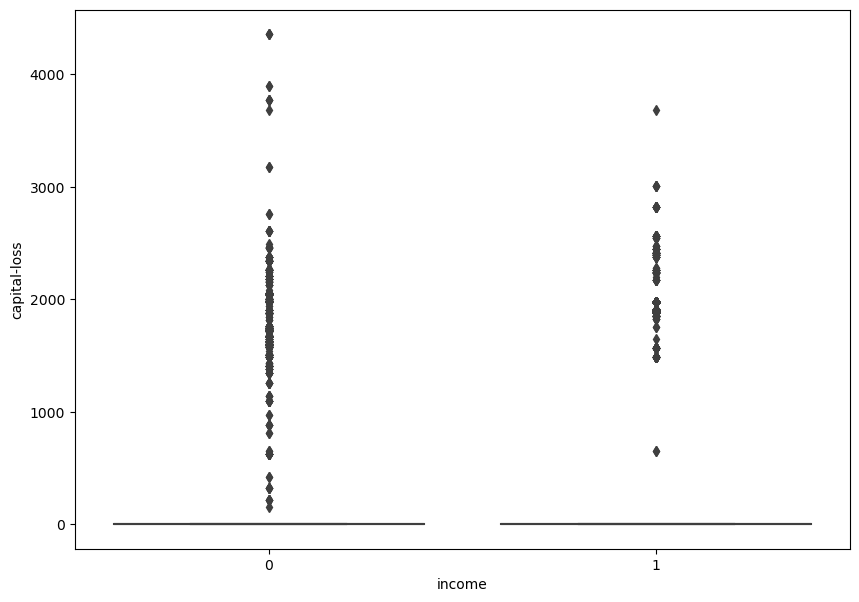

In [35]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income",y="capital-loss",data=data)
plt.show()

In [36]:
data =  data[(np.abs(stats.zscore(data["capital-gain"]))<3)]

income_1 = datatest[datatest['income']==1]["capital-loss"]
income_0 = datatest[datatest['income']==0]["capital-loss"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1, income_0, equal_var= False)
print("ttest",ttest)
print("p value",pval)

if pval<0.05:
    print("We reject null hypothesis hence depedent or have relation")
else:
    print("we accept null hypothesis hence independent")

ttest 1.6656083059396294
p value 0.09802909398334003
we accept null hypothesis hence independent


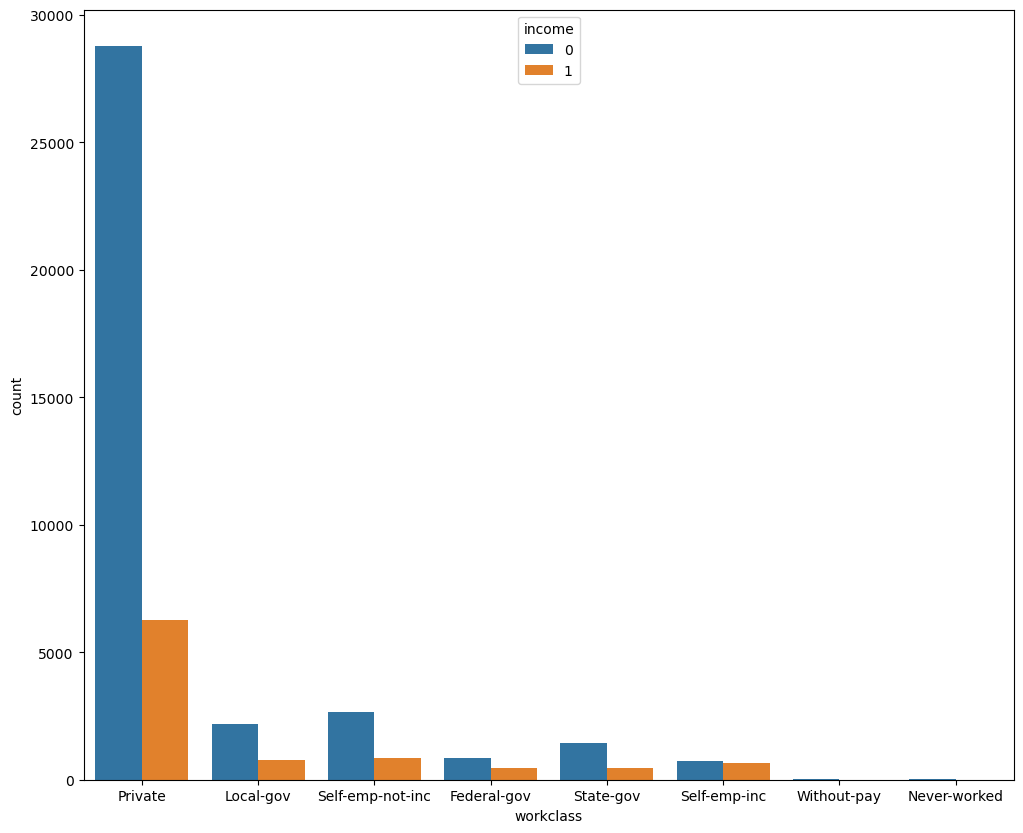

In [37]:
# plot relationship with income
plt.figure(figsize=(12,10))
# total=float(len(data["income"]))

ax=sns.countplot(x="workclass",hue="income",data=data)
# for p in ax.patches:
#     height=p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,height+3,
#            "{:1.2f}".format((height/total)*100),ha="center")
    
plt.show()


In [38]:
# contingencytable
c_t=pd.crosstab(data["workclass"].sample(frac=0.004,replace=True,random_state=1),
               data["income"].sample(frac=0.004,replace=True,random_state=1),margins=False)
c_t

income,0,1
workclass,,
Federal-gov,5,1
Local-gov,12,4
Private,101,22
Self-emp-inc,3,3
Self-emp-not-inc,16,5
State-gov,7,6


In [39]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(c_t)
print("dof=%d" %dof)
print("p_value",p)
print(expected)

prob=0.95
critical=chi2.ppf(prob, dof)
print("probability=%3f, critical=%3f, stat=%3f" %(prob,critical,stat))

if abs(stat)>=critical:
    print("Dependent (reject)")
else:
    print("Independent(fail to reject)")
    
if p<0.05:
    print("Dependent (reject)")
else:
    print("Independent(fail to reject)")

dof=5
p_value 0.12843655514007102
[[ 4.67027027  1.32972973]
 [12.45405405  3.54594595]
 [95.74054054 27.25945946]
 [ 4.67027027  1.32972973]
 [16.34594595  4.65405405]
 [10.11891892  2.88108108]]
probability=0.950000, critical=11.070498, stat=8.549563
Independent(fail to reject)
Independent(fail to reject)


In [40]:
c_t=pd.crosstab(data["education"].sample(frac=0.04,random_state=1),data["income"].
               sample(frac=0.04, random_state=1))
c_t

income,0,1
education,,
10th,54,2
11th,72,8
12th,18,2
1st-4th,13,0
5th-6th,15,0
7th-8th,35,5
9th,36,2
Assoc-acdm,50,14
Assoc-voc,58,23


In [41]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [42]:
stat, p, dof, expected=chi2_contingency(c_t)
print("dof=%d" %dof)
print("p_value",p)
print(expected)
# interpret test-stastistic
prob=0.95
critical=chi2.ppf(prob, dof)
print("probability=%3f, critical=%3f, stat=%3f" %(prob, critical, stat))

if abs(stat) >= critical:
    print("Depedent(reject null hypothesis)")
else:
    print("Independent (fail to reject)")

dof=15
p_value 1.3926098009855444e-33
[[ 43.89599133  12.10400867]
 [ 62.70855905  17.29144095]
 [ 15.67713976   4.32286024]
 [ 10.19014085   2.80985915]
 [ 11.75785482   3.24214518]
 [ 31.35427952   8.64572048]
 [ 29.78656555   8.21343445]
 [ 50.16684724  13.83315276]
 [ 63.49241603  17.50758397]
 [249.26652221  68.73347779]
 [ 15.67713976   4.32286024]
 [466.39490791 128.60509209]
 [ 76.03412784  20.96587216]
 [  3.13542795   0.86457205]
 [ 18.02871073   4.97128927]
 [299.43336945  82.56663055]]
probability=0.950000, critical=24.995790, stat=195.978430
Depedent(reject null hypothesis)


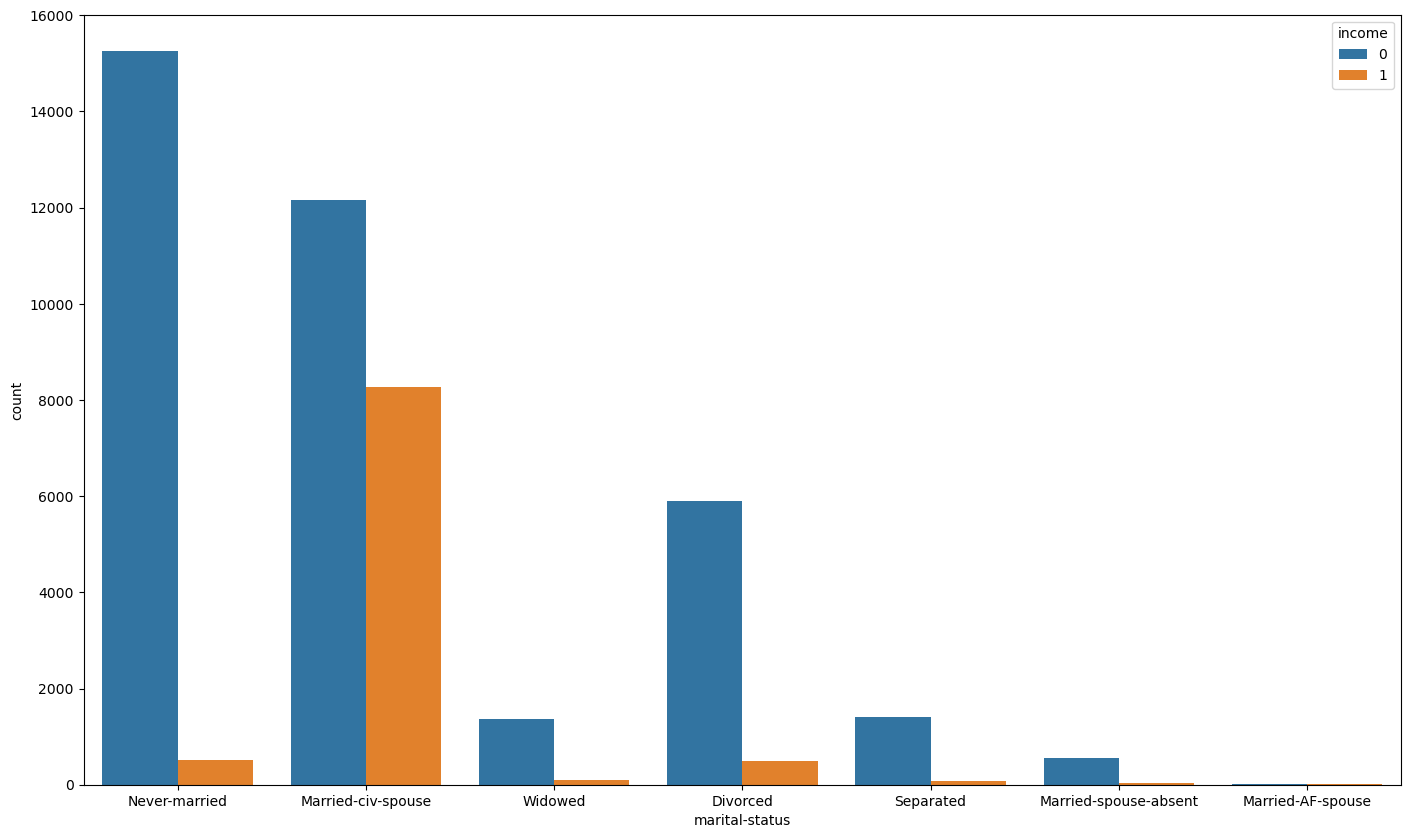

In [43]:
plt.figure(figsize=(17,10))
# total=float(len(data["income"]))

ax=sns.countplot(x="marital-status",hue="income",data=data)
# for p in ax.patches:
#     height=p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,height+3,
#            "{:1.2f}".format((height/total)*100),ha="center")
    
plt.show()

In [44]:
c_t=pd.crosstab(data["marital-status"].sample(frac=0.04,random_state=1),data["income"].
               sample(frac=0.04, random_state=1))
c_t

income,0,1
marital-status,,
Divorced,242,14
Married-AF-spouse,0,2
Married-civ-spouse,497,347
Married-spouse-absent,28,0
Never-married,568,25
Separated,62,5
Widowed,50,6


In [45]:
stat, p, dof, expected=chi2_contingency(c_t)
print("dof=%d" %dof)
print("p_value",p)
print(expected)
# interpret test-stastistic
prob=0.95
critical=chi2.ppf(prob, dof)
print("probability=%3f, critical=%3f, stat=%3f" %(prob, critical, stat))

if abs(stat) >= critical:
    print("Depedent(reject null hypothesis)")
else:
    print("Independent (fail to reject)")

dof=6
p_value 5.058230297526119e-75
[[2.00667389e+02 5.53326111e+01]
 [1.56771398e+00 4.32286024e-01]
 [6.61575298e+02 1.82424702e+02]
 [2.19479957e+01 6.05200433e+00]
 [4.64827194e+02 1.28172806e+02]
 [5.25184182e+01 1.44815818e+01]
 [4.38959913e+01 1.21040087e+01]]
probability=0.950000, critical=12.591587, stat=361.570804
Depedent(reject null hypothesis)


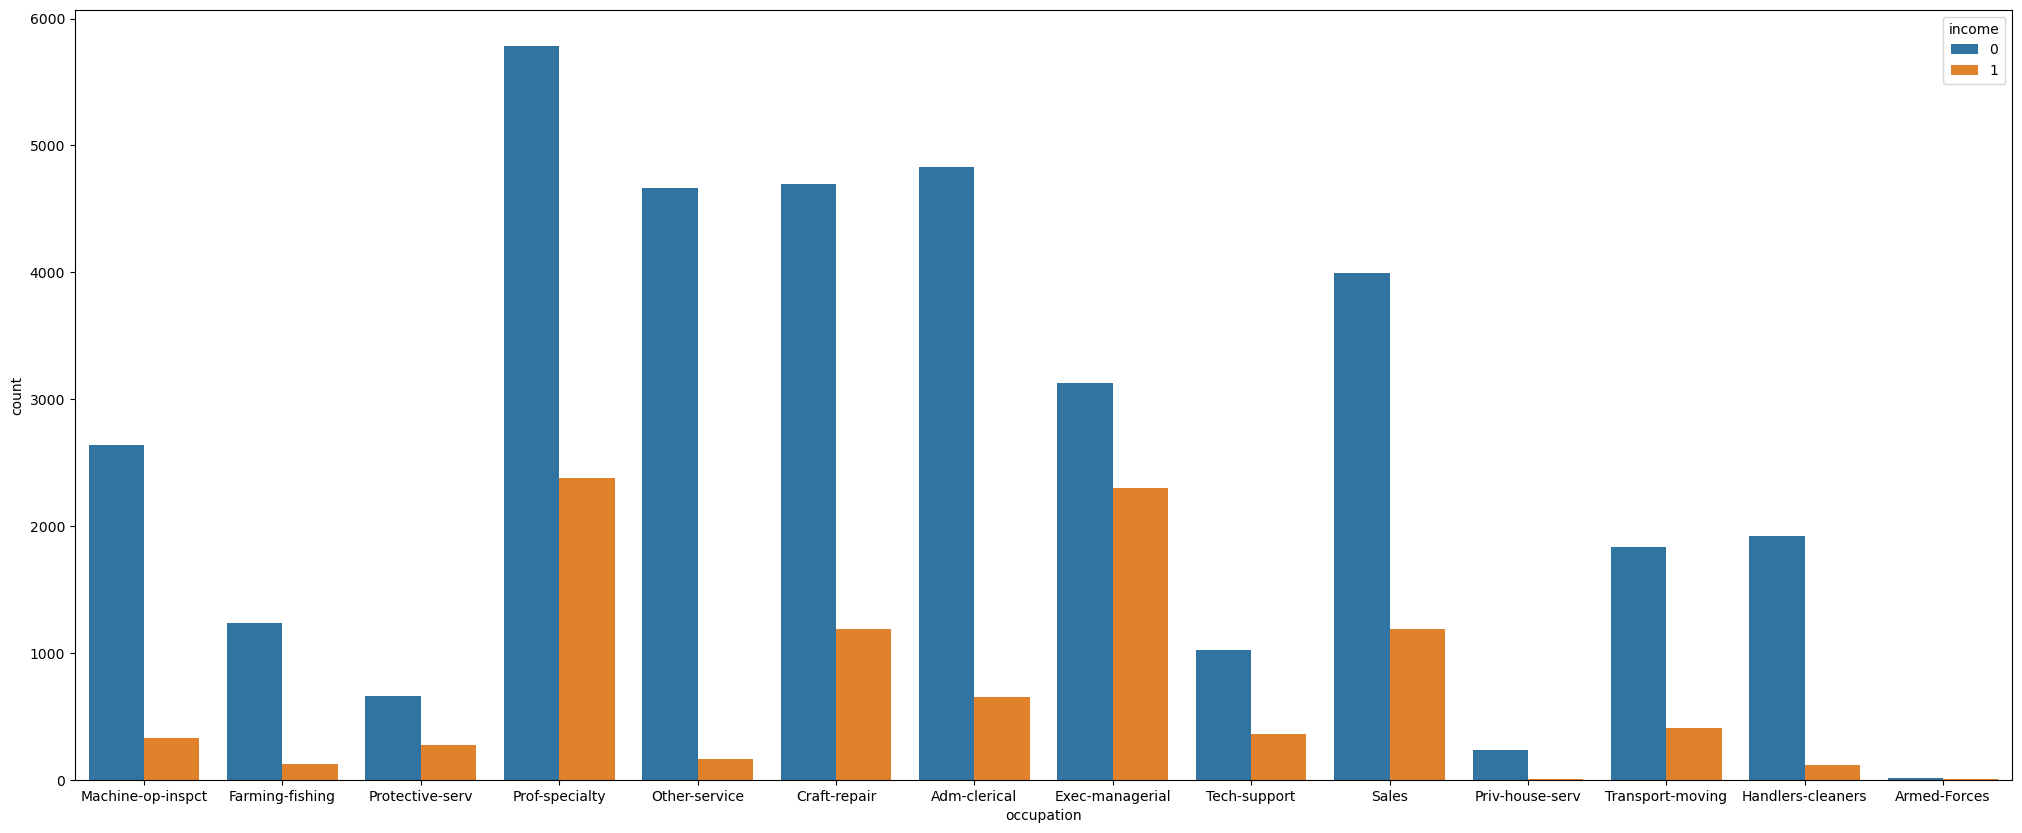

In [46]:
plt.figure(figsize=(25,10))
# total=float(len(data["income"]))

ax=sns.countplot(x="occupation",hue="income",data=data)
# for p in ax.patches:
#     height=p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,height+3,
#            "{:1.2f}".format((height/total)*100),ha="center")
    
plt.show()

In [47]:
c_t=pd.crosstab(data["occupation"].sample(frac=0.04,random_state=1),data["income"].
               sample(frac=0.04, random_state=1))
c_t

income,0,1
occupation,,
Adm-clerical,197,23
Craft-repair,165,58
Exec-managerial,132,90
Farming-fishing,42,5
Handlers-cleaners,84,9
Machine-op-inspct,108,13
Other-service,166,4
Priv-house-serv,7,0
Prof-specialty,244,101


In [48]:
stat, p, dof, expected=chi2_contingency(c_t)
print("dof=%d" %dof)
print("p_value",p)
print(expected)
# interpret test-stastistic
prob=0.95
critical=chi2.ppf(prob, dof)
print("probability=%3f, critical=%3f, stat=%3f" %(prob, critical, stat))

if abs(stat) >= critical:
    print("Depedent(reject null hypothesis)")
else:
    print("Independent (fail to reject)")

dof=12
p_value 1.0464691550380991e-24
[[172.44853738  47.55146262]
 [174.80010834  48.19989166]
 [174.01625135  47.98374865]
 [ 36.84127844  10.15872156]
 [ 72.89869989  20.10130011]
 [ 94.84669556  26.15330444]
 [133.25568797  36.74431203]
 [  5.48699892   1.51300108]
 [270.43066089  74.56933911]
 [ 25.08342362   6.91657638]
 [164.6099675   45.3900325 ]
 [ 47.81527627  13.18472373]
 [ 74.46641387  20.53358613]]
probability=0.950000, critical=21.026070, stat=143.749552
Depedent(reject null hypothesis)


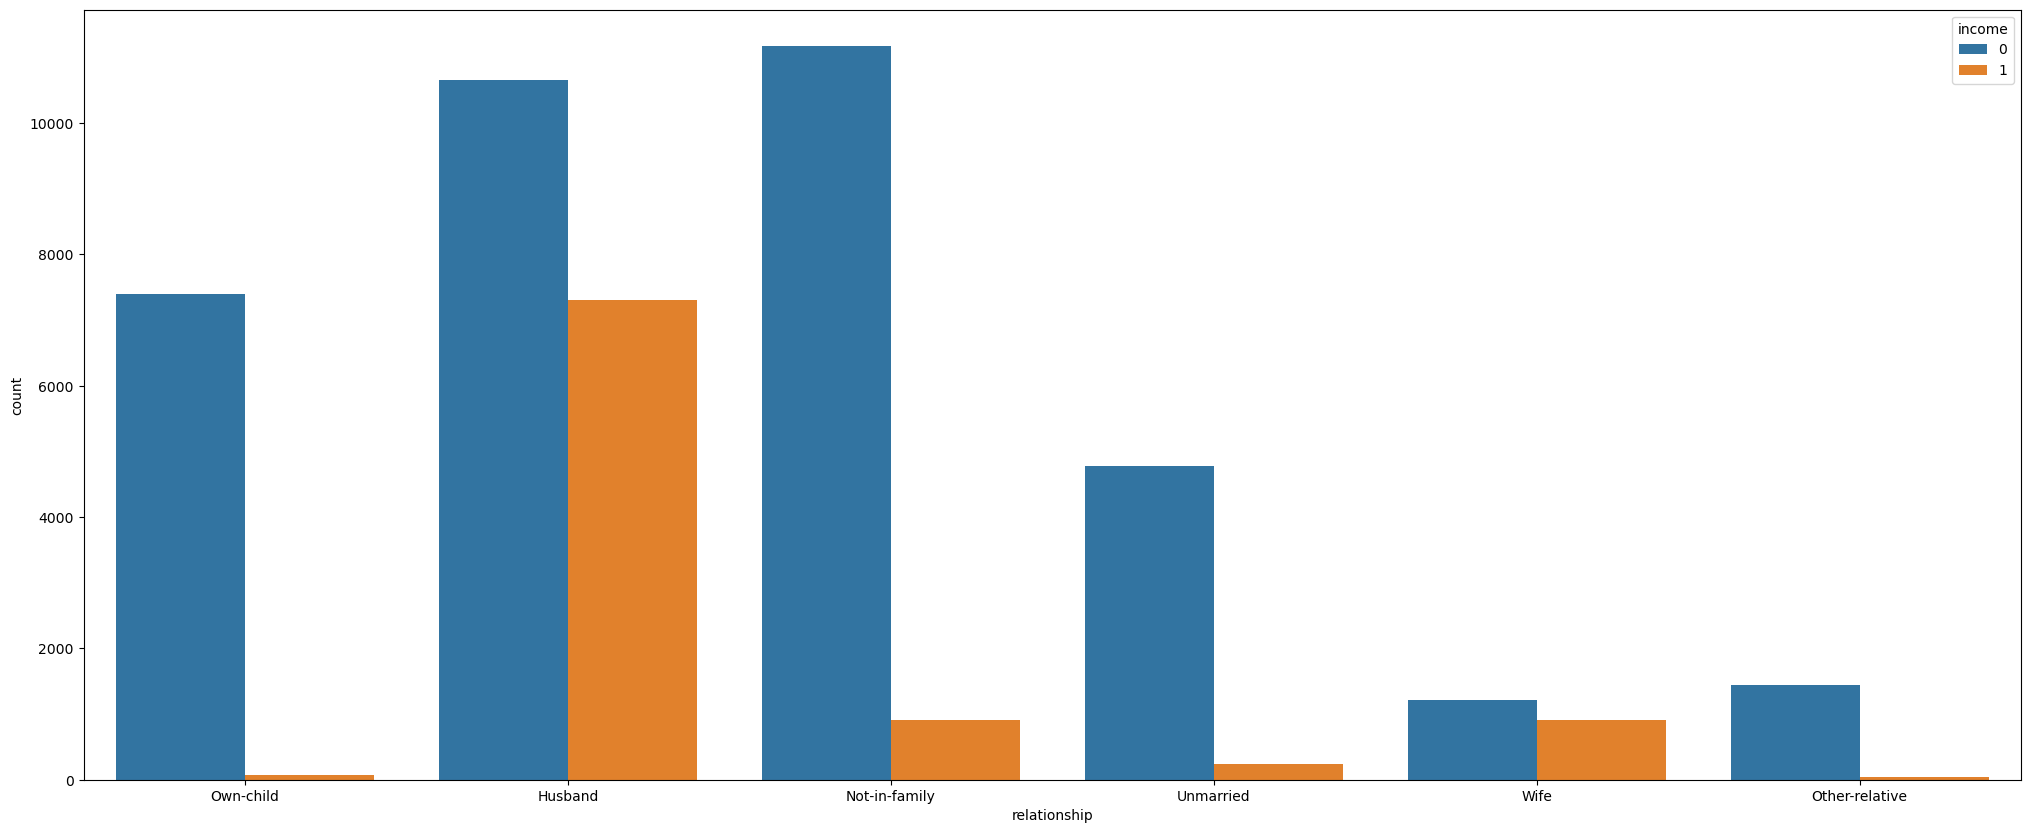

In [49]:
plt.figure(figsize=(25,10))
# total=float(len(data["income"]))

ax=sns.countplot(x="relationship",hue="income",data=data)
# for p in ax.patches:
#     height=p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,height+3,
#            "{:1.2f}".format((height/total)*100),ha="center")
    
plt.show()

In [50]:
c_t=pd.crosstab(data["relationship"].sample(frac=0.04,random_state=1),data["income"].
               sample(frac=0.04, random_state=1))
c_t

income,0,1
relationship,,
Husband,440,312
Not-in-family,446,36
Other-relative,58,1
Own-child,270,2
Unmarried,186,12
Wife,47,36


In [51]:
stat, p, dof, expected=chi2_contingency(c_t)
print("dof=%d" %dof)
print("p_value",p)
print(expected)
# interpret test-stastistic
prob=0.95
critical=chi2.ppf(prob, dof)
print("probability=%3f, critical=%3f, stat=%3f" %(prob, critical, stat))

if abs(stat) >= critical:
    print("Depedent(reject null hypothesis)")
else:
    print("Independent (fail to reject)")

dof=5
p_value 2.9467299360031596e-77
[[589.46045504 162.53954496]
 [377.81906826 104.18093174]
 [ 46.2475623   12.7524377 ]
 [213.20910076  58.79089924]
 [155.20368364  42.79631636]
 [ 65.06013001  17.93986999]]
probability=0.950000, critical=11.070498, stat=367.524579
Depedent(reject null hypothesis)


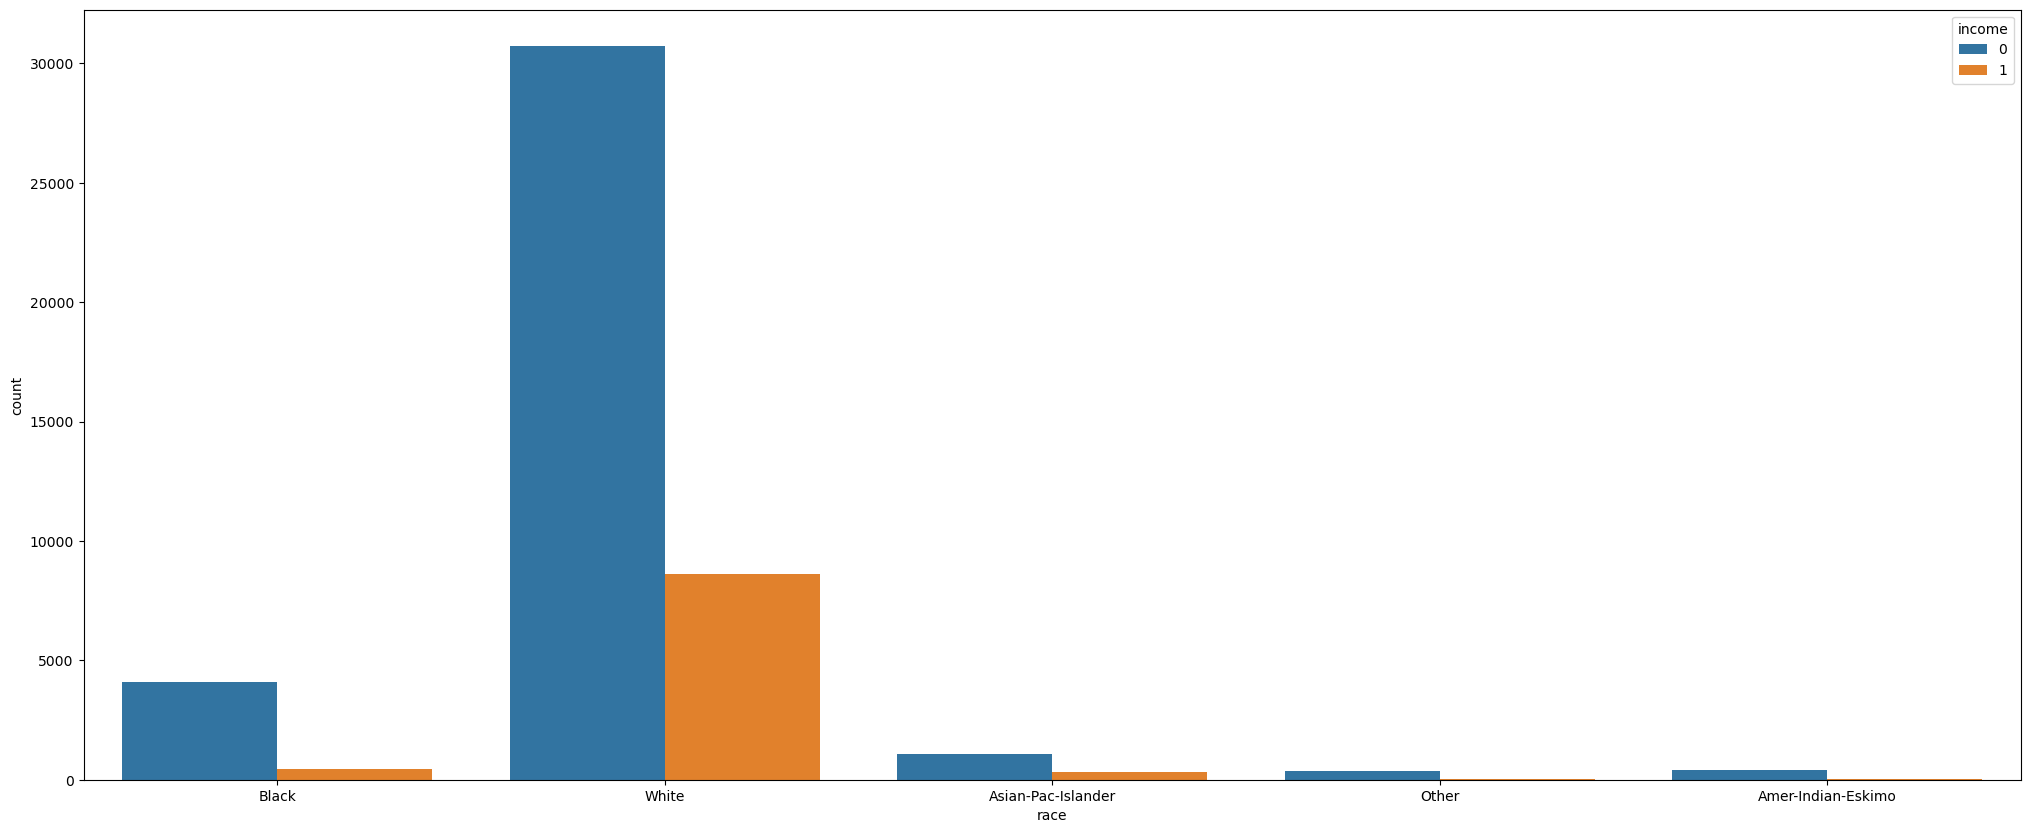

In [52]:
plt.figure(figsize=(25,10))
# total=float(len(data["income"]))

ax=sns.countplot(x="race",hue="income",data=data)
# for p in ax.patches:
#     height=p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,height+3,
#            "{:1.2f}".format((height/total)*100),ha="center")
    
plt.show()

In [53]:
c_t=pd.crosstab(data["race"].sample(frac=0.04,random_state=1),data["income"].
               sample(frac=0.04, random_state=1))
c_t

income,0,1
race,,
Amer-Indian-Eskimo,13,4
Asian-Pac-Islander,53,14
Black,171,15
Other,11,3
White,1199,363


In [54]:
stat, p, dof, expected=chi2_contingency(c_t)
print("dof=%d" %dof)
print("p_value",p)
print(expected)
# interpret test-stastistic
prob=0.95
critical=chi2.ppf(prob, dof)
print("probability=%3f, critical=%3f, stat=%3f" %(prob, critical, stat))

if abs(stat) >= critical:
    print("Depedent(reject null hypothesis)")
else:
    print("Independent (fail to reject)")

dof=4
p_value 0.00014885367046635903
[[  13.3255688     3.6744312 ]
 [  52.5184182    14.4815818 ]
 [ 145.79739978   40.20260022]
 [  10.97399783    3.02600217]
 [1224.38461538  337.61538462]]
probability=0.950000, critical=9.487729, stat=22.648208
Depedent(reject null hypothesis)


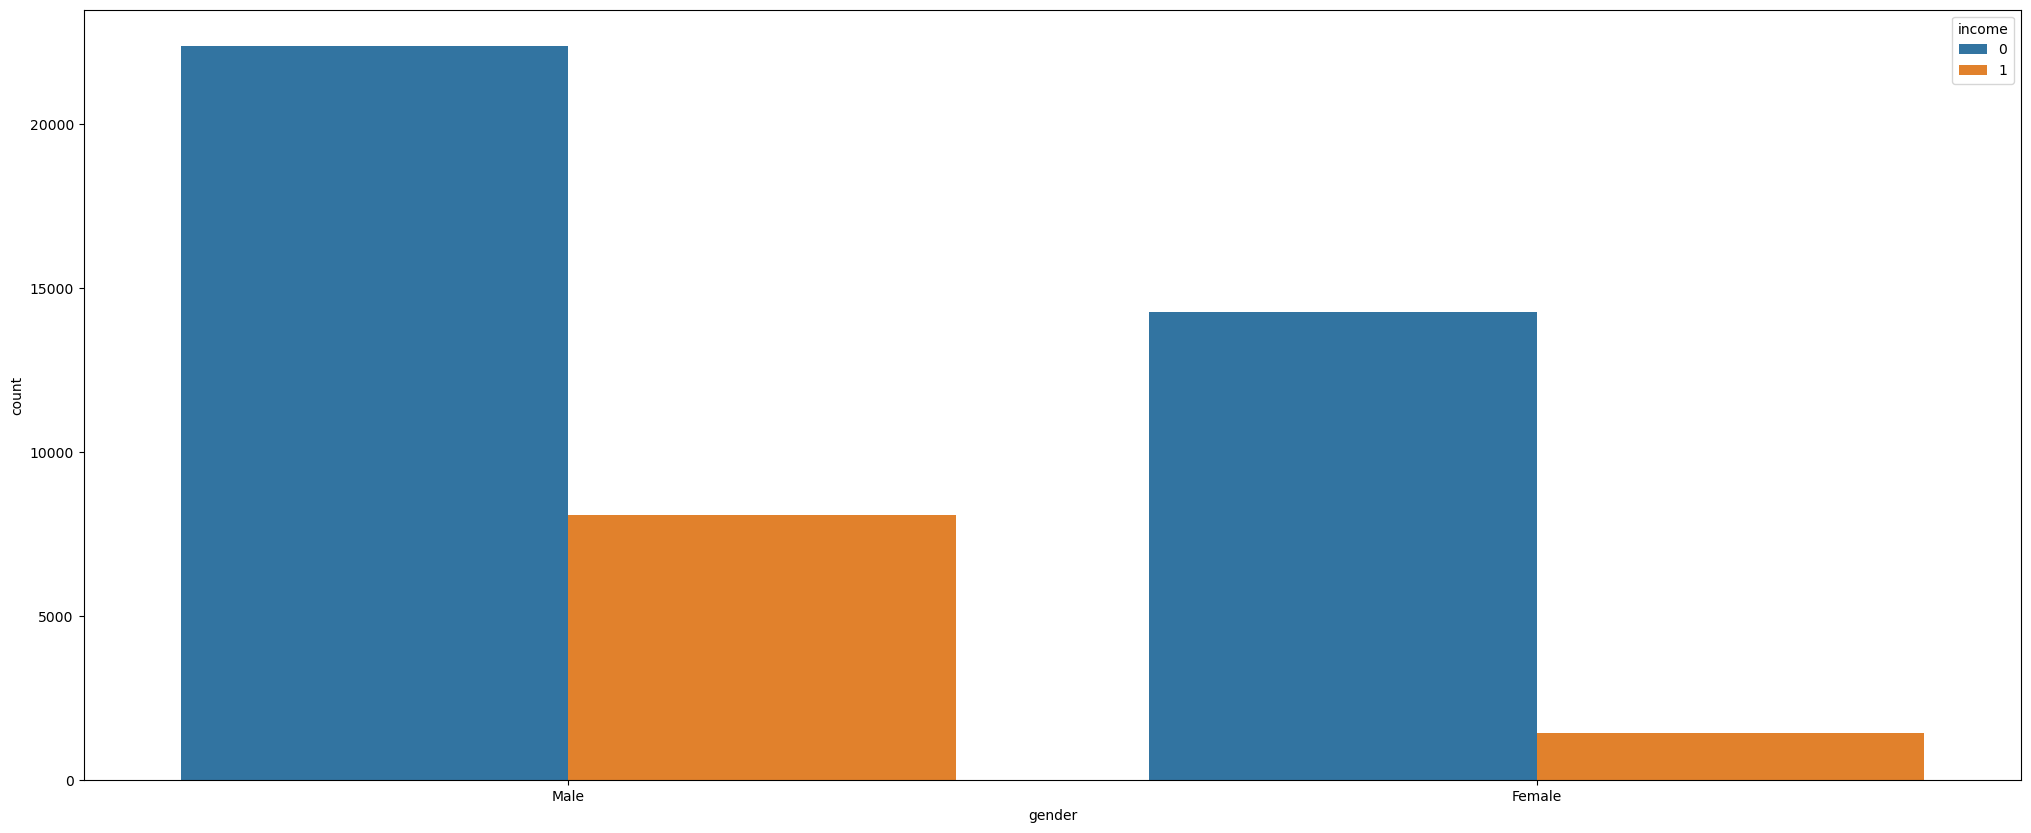

In [55]:
plt.figure(figsize=(25,10))
# total=float(len(data["income"]))

ax=sns.countplot(x="gender",hue="income",data=data)
# for p in ax.patches:
#     height=p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,height+3,
#            "{:1.2f}".format((height/total)*100),ha="center")
    
plt.show()

In [56]:
c_t=pd.crosstab(data["gender"].sample(frac=0.04,random_state=1),data["income"].
               sample(frac=0.04, random_state=1))
c_t

income,0,1
gender,,
Female,563,56
Male,884,343


In [57]:
stat, p, dof, expected=chi2_contingency(c_t)
print("dof=%d" %dof)
print("p_value",p)
print(expected)
# interpret test-stastistic
prob=0.95
critical=chi2.ppf(prob, dof)
print("probability=%3f, critical=%3f, stat=%3f" %(prob, critical, stat))

if abs(stat) >= critical:
    print("Depedent(reject null hypothesis)")
else:
    print("Independent (fail to reject)")

dof=1
p_value 2.091494931892892e-20
[[485.20747562 133.79252438]
 [961.79252438 265.20747562]]
probability=0.950000, critical=3.841459, stat=85.702489
Depedent(reject null hypothesis)


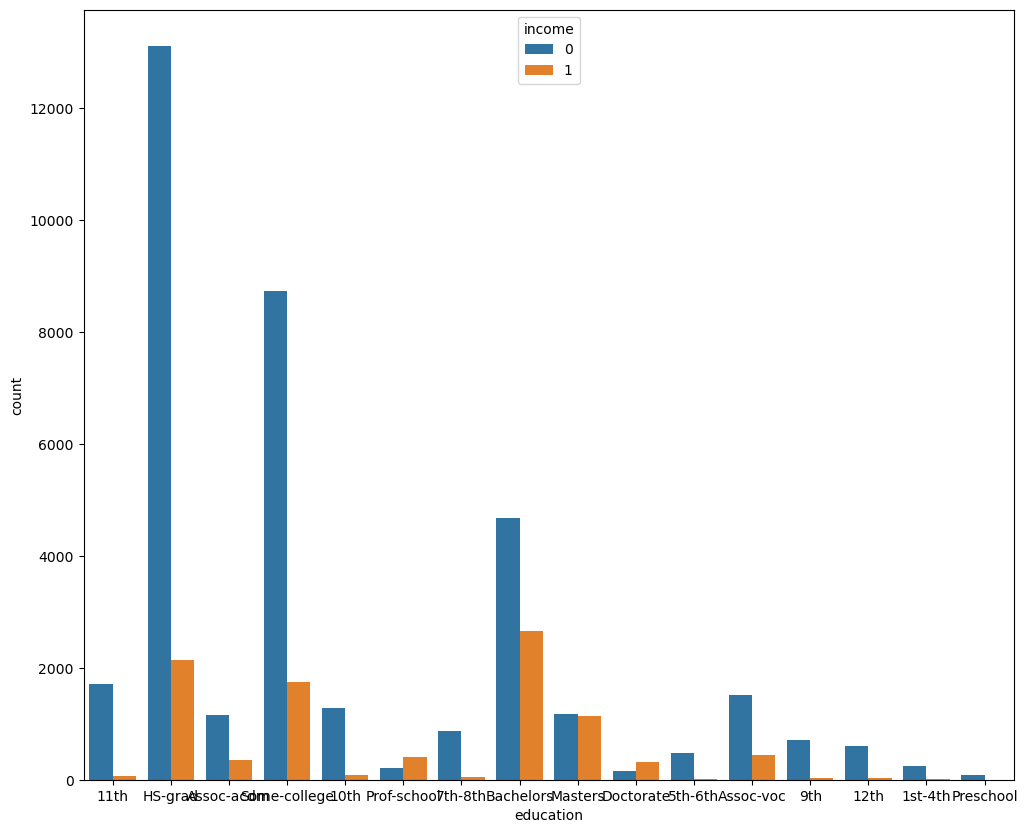

In [58]:
# plot relationship with income
plt.figure(figsize=(12,10))
# total=float(len(data["income"]))

ax=sns.countplot(x="education",hue="income",data=data)
# for p in ax.patches:
#     height=p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,height+3,
#            "{:1.2f}".format((height/total)*100),ha="center")
    
plt.show()


In [59]:
c_t=pd.crosstab(data["education"].sample(frac=0.04,random_state=1),data["income"].
               sample(frac=0.04, random_state=1))
c_t

income,0,1
education,,
10th,54,2
11th,72,8
12th,18,2
1st-4th,13,0
5th-6th,15,0
7th-8th,35,5
9th,36,2
Assoc-acdm,50,14
Assoc-voc,58,23


In [60]:
stat, p, dof, expected=chi2_contingency(c_t)
print("dof=%d" %dof)
print("p-value",p)
print(expected)
# interpret test-stastistic
prob=0.95
critical=chi2.ppf(prob, dof)
print("probability=%3f, critical=%3f, stat=%3f" %(prob, critical, stat))

if abs(stat) >= critical:
    print("Depedent(reject)")
else:
    print("Independent (fail to reject)")

dof=15
p-value 1.3926098009855444e-33
[[ 43.89599133  12.10400867]
 [ 62.70855905  17.29144095]
 [ 15.67713976   4.32286024]
 [ 10.19014085   2.80985915]
 [ 11.75785482   3.24214518]
 [ 31.35427952   8.64572048]
 [ 29.78656555   8.21343445]
 [ 50.16684724  13.83315276]
 [ 63.49241603  17.50758397]
 [249.26652221  68.73347779]
 [ 15.67713976   4.32286024]
 [466.39490791 128.60509209]
 [ 76.03412784  20.96587216]
 [  3.13542795   0.86457205]
 [ 18.02871073   4.97128927]
 [299.43336945  82.56663055]]
probability=0.950000, critical=24.995790, stat=195.978430
Depedent(reject)


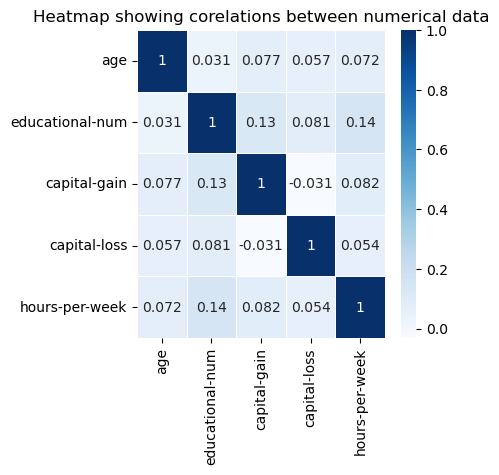

In [61]:
plt.figure(figsize=(4,4))
sns.heatmap(data_num.corr(),annot=True, linewidths=.5,cmap="Blues")
plt.title("Heatmap showing corelations between numerical data")
plt.show()

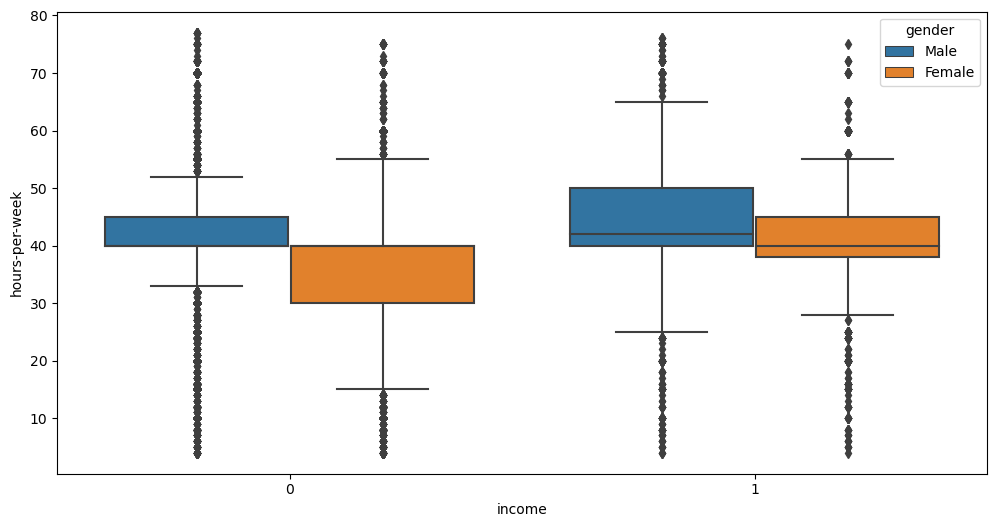

In [62]:
plt.figure(figsize=(12,6))
sns.boxplot(x="income",y="hours-per-week",hue="gender",data=data)
plt.show()

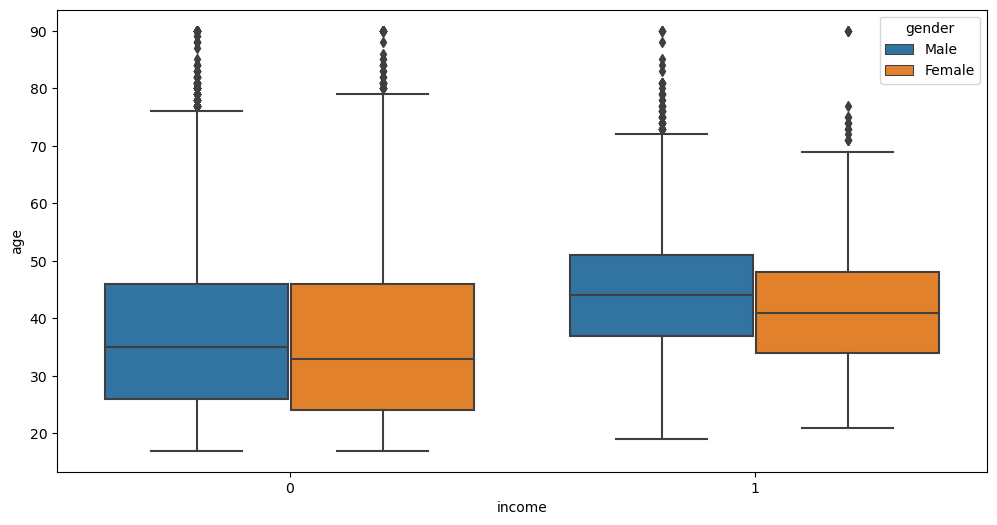

In [63]:
plt.figure(figsize=(12,6))
sns.boxplot(x="income",y="age",hue="gender",data=data)
plt.show()

In [64]:
cols=["workclass","occupation"]
cat_col=data.dtypes[data.dtypes=="object"]
for col in cat_col.index:
    if col in cols:
        print(f"---------------------{col}--------------------")
        print(data_num[data_num["hours-per-week"]==99][col].value_counts())
    else:
        continue

---------------------workclass--------------------
Private             63
Self-emp-not-inc    36
Self-emp-inc        15
?                   11
Local-gov            7
State-gov            3
Federal-gov          2
Name: workclass, dtype: int64
---------------------occupation--------------------
Prof-specialty       25
Farming-fishing      20
Transport-moving     19
Exec-managerial      18
Other-service        15
?                    11
Craft-repair         10
Sales                 6
Protective-serv       4
Priv-house-serv       4
Adm-clerical          2
Tech-support          2
Handlers-cleaners     1
Name: occupation, dtype: int64


In [65]:
data["capital_change"]=data["capital-gain"]-data["capital-loss"]
data["capital_change"].describe()

count    46144.000000
mean        57.879139
std        888.787996
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7262.000000
Name: capital_change, dtype: float64

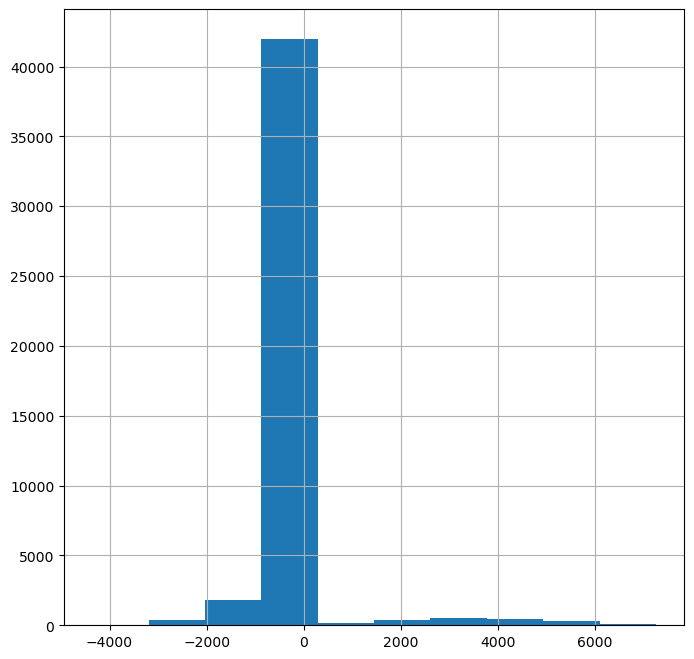

In [66]:
data["capital_change"].hist(figsize=(8,8))
plt.show()

In [67]:


income_1 = data[data['income']==1]["capital_change"]
income_0 = data[data['income']==0]["capital_change"]

data =  data[(np.abs(stats.zscore(data["capital_change"]))<3)]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1, income_0, equal_var= False)
print("ttest",ttest)
print("p value",pval)

if pval<0.05:
    print("We reject null hypothesis hence depedent or have relation")
else:
    print("we accept null hypothesis hence independent")

ttest -0.07200927991324964
p value 0.942686106412615
we accept null hypothesis hence independent
